In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/5) Recurrent Neural Network/new world image.jpg
/kaggle/input/5) Recurrent Neural Network/Stock_Price_Test.csv
/kaggle/input/5) Recurrent Neural Network/Recurrent Neural Network (RNN).ipynb
/kaggle/input/5) Recurrent Neural Network/Stock_Price_Train.csv
/kaggle/input/5) Recurrent Neural Network/one to many.jpg
/kaggle/input/5) Recurrent Neural Network/lstm.jpg
/kaggle/input/5) Recurrent Neural Network/many to one.jpg
/kaggle/input/5) Recurrent Neural Network/many to many.jpg
/kaggle/input/5) Recurrent Neural Network/international-airline-passengers.csv
/kaggle/input/5) Recurrent Neural Network/temporal loop.jpg
/kaggle/input/5) Recurrent Neural Network/.ipynb_checkpoints/Recurrent Neural Network (RNN)-checkpoint.ipynb
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/rnn.py
/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price

In [2]:
train_data = pd.read_csv('/kaggle/input/5) Recurrent Neural Network/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

In [3]:
train_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train = train_data.loc[:,['Open']].values


In [5]:
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaled = scaler.fit_transform(train)
train_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

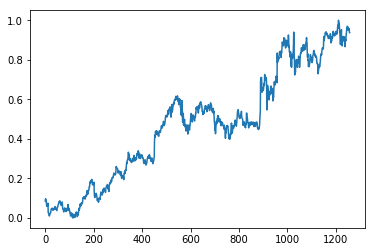

In [7]:
plt.plot(train_scaled)

In [8]:
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [10]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

## Create the RNN Model

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

regressor = Sequential()

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Using TensorFlow backend.


Epoch 1/100
1208/1208 [==============================] - 3s 2ms/step - loss: 0.3904
Epoch 2/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.2109
Epoch 3/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.1555
Epoch 4/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.1252
Epoch 5/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0986
Epoch 6/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0758
Epoch 7/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0584
Epoch 8/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0538
Epoch 9/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0480
Epoch 10/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0357
Epoch 11/100
1208/1208 [==============================] - 2s 1ms/step - loss: 0.0346
Epoch 12/100
1208/1208 [==============================] - 2s 1ms/step - lo

In [12]:
test_data = pd.read_csv('/kaggle/input/5) Recurrent Neural Network/Stock_Price_Test.csv')

In [13]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [14]:
real_stock_price = test_data.loc[:,['Open']].values

In [15]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
total_data = pd.concat((train_data['Open'],test_data['Open']),axis=0)
inputs = total_data[len(total_data)-len(test_data)-timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) #min max scaler

In [17]:
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [18]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

## Visualization

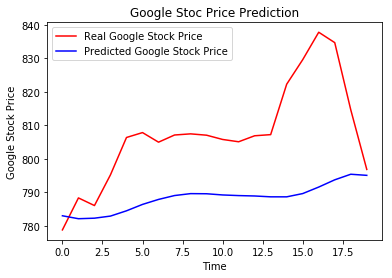

In [19]:
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stoc Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()